In [46]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from stacked_plots import StackedBarChart
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [47]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
mtd_interval = [200]
network_size = [150]
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'

static_features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metrics = ["all_features"] + static_features + time_features



In [48]:
import pandas as pd

# Create an empty DataFrame to store all the data for all metrics
all_model_data = pd.DataFrame()

for metric in metrics:
    models = [
        metric,
        f"{metric}_CompleteTopologyShuffle",
        f"{metric}_IPShuffle",
        f"{metric}_OSDiversity",
        f"{metric}_ServiceDiversity"
    ]
    
        
    # Initialize the chart for the current model
    chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
    weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
    
    # Get data for current model
    schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


    
    
    # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
    if all_model_data.empty:
        all_model_data = schemes_data
    else:
        all_model_data = pd.concat([all_model_data, schemes_data], axis=1)





In [49]:
# Now all_schemes_data contains the concatenated data from all models as columns
all_model_data

,all_features,all_features_CompleteTopologyShuffle,all_features_IPShuffle,all_features_OSDiversity,all_features_ServiceDiversity,host_compromise_ratio,host_compromise_ratio_CompleteTopologyShuffle,host_compromise_ratio_IPShuffle,host_compromise_ratio_OSDiversity,host_compromise_ratio_ServiceDiversity,...,overall_mttc_avg,overall_mttc_avg_CompleteTopologyShuffle,overall_mttc_avg_IPShuffle,overall_mttc_avg_OSDiversity,overall_mttc_avg_ServiceDiversity,time_since_last_mtd,time_since_last_mtd_CompleteTopologyShuffle,time_since_last_mtd_IPShuffle,time_since_last_mtd_OSDiversity,time_since_last_mtd_ServiceDiversity
mtd_interval,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
MEF,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ASR,1.527778,1.500000,1.666667,1.500000,1.500000,1.562500,1.500000,1.666667,1.520833,1.500000,...,1.527778,1.500000,1.666667,1.520833,1.500000,1.527778,1.500000,1.708333,1.500000,1.472222
time_to_compromise,1.531923,1.472921,1.496850,1.698884,1.636721,1.539680,1.459505,1.510210,1.687562,1.611772,...,1.533648,1.444419,1.559871,1.715449,1.607612,1.521410,1.479874,1.540029,1.700349,1.618370
host_compromise_ratio,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,...,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652,0.695652
network_size,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
exposed_endpoints,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
attack_path_exposure,2.440142,2.259621,1.968381,2.701346,2.627010,2.481152,2.199308,1.951468,2.635384,2.608279,...,2.444182,2.227515,1.928210,2.692724,2.627622,2.460476,2.211664,1.859720,2.659974,2.585116
ROA,0.952065,1.103992,0.955846,0.966369,0.984193,1.013113,1.061796,1.096744,0.943407,0.996679,...,1.187526,1.074271,1.176215,0.919174,0.892322,0.924246,0.997402,0.986353,1.044104,1.005516
risk,1.033532,1.098857,1.000113,0.974527,0.995954,0.943300,1.113337,1.146568,0.987845,0.973206,...,1.133734,1.083501,1.128169,1.060990,0.870949,1.026821,1.040736,0.982109,1.053469,1.002813


In [50]:
data = all_model_data.T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()

In [51]:
chart.plot_n_schemes(data, weights=weights)

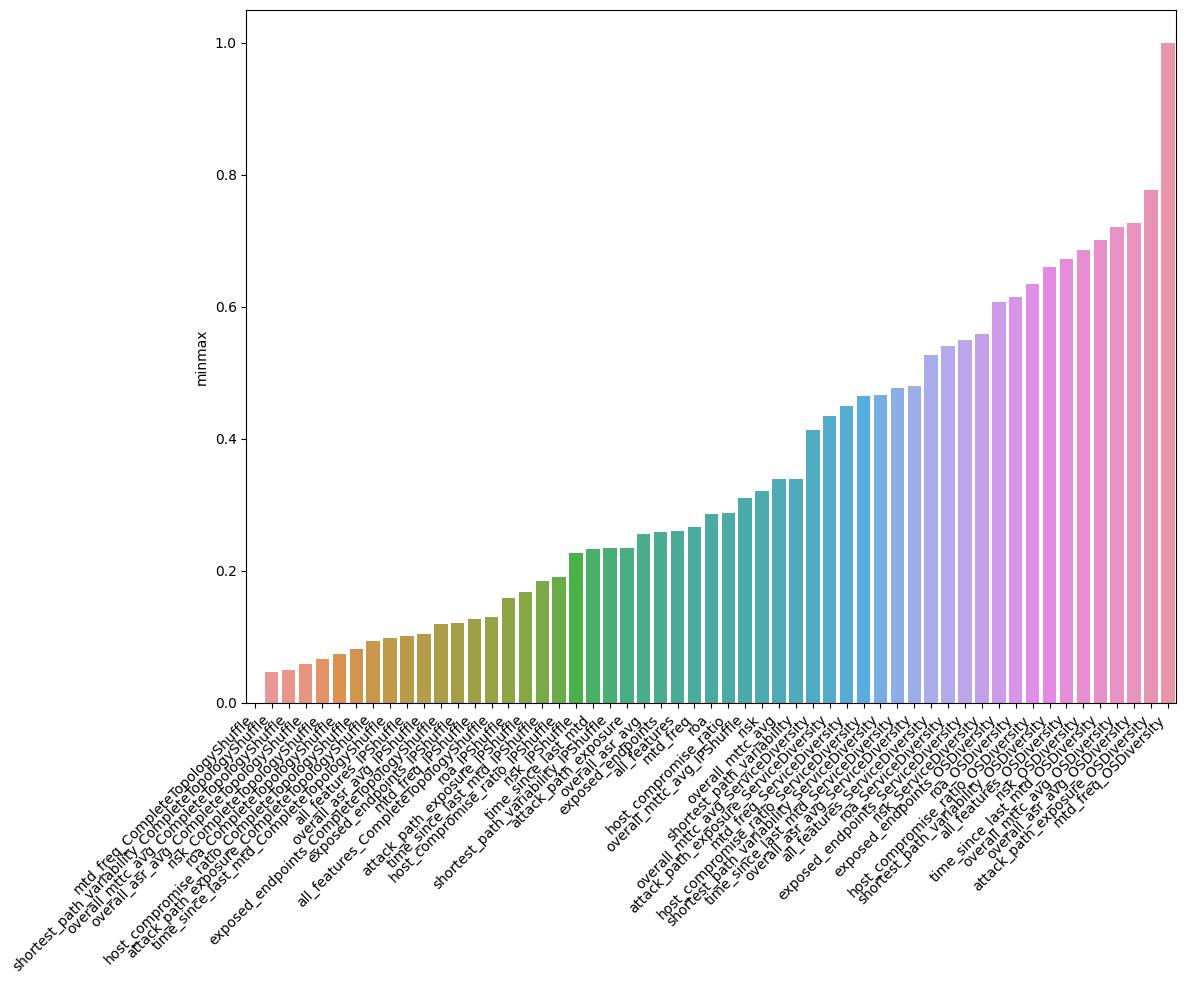

In [ ]:
chart.normalized_chart("minmax")

In [ ]:
import seaborn as sns


In [ ]:
chart.weighted_data.sort_values(axis=0, by="minmax")

,ASR,time_to_compromise,attack_path_exposure,ROA,risk,sum,zscore,minmax
mtd_freq_CompleteTopologyShuffle,1.500000,14.563672,2.241649,0.833052,0.966269,20.104641,-1.448481,0.000000
shortest_path_variability_CompleteTopologyShuffle,1.500000,14.699340,2.202590,0.948762,0.960553,20.311244,-1.255877,0.045867
overall_mttc_avg_CompleteTopologyShuffle,1.500000,14.444192,2.227515,1.074271,1.083501,20.329479,-1.238877,0.049915
overall_asr_avg_CompleteTopologyShuffle,1.500000,14.789825,2.206705,0.919617,0.952277,20.368425,-1.202570,0.058562
risk_CompleteTopologyShuffle,1.500000,14.744946,2.217894,0.976695,0.961107,20.400642,-1.172536,0.065714
roa_CompleteTopologyShuffle,1.500000,14.596609,2.230039,0.984932,1.127747,20.439327,-1.136472,0.074302
host_compromise_ratio_CompleteTopologyShuffle,1.500000,14.595052,2.199308,1.061796,1.113337,20.469493,-1.108350,0.080999
attack_path_exposure_CompleteTopologyShuffle,1.500000,14.797920,2.213322,0.996298,1.020182,20.527722,-1.054067,0.093926
time_since_last_mtd_CompleteTopologyShuffle,1.500000,14.798742,2.211664,0.997402,1.040736,20.548544,-1.034655,0.098549
all_features_IPShuffle,1.666667,14.968500,1.968381,0.955846,1.000113,20.559506,-1.024436,0.100983
